<a href="https://colab.research.google.com/github/Ryo-yuu/Demo/blob/main/Customer_Segmentation_and_Targeted_Marketing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **I. EDA**

In [ ]:
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/Mall_Customers.csv")

df.head()

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.shape

(200, 5)

In [ ]:
df.value_counts('Gender')

,count
Gender,
Female,112
Male,88


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


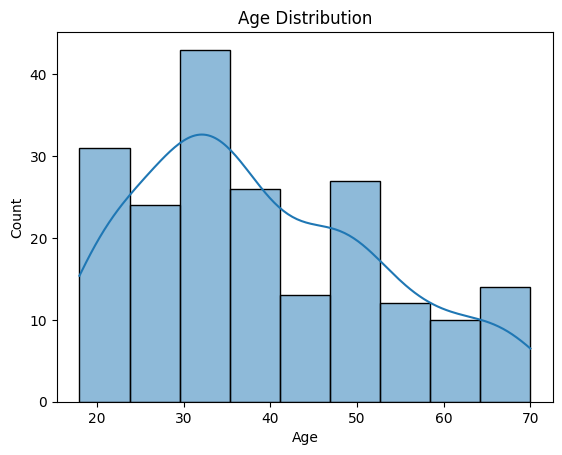

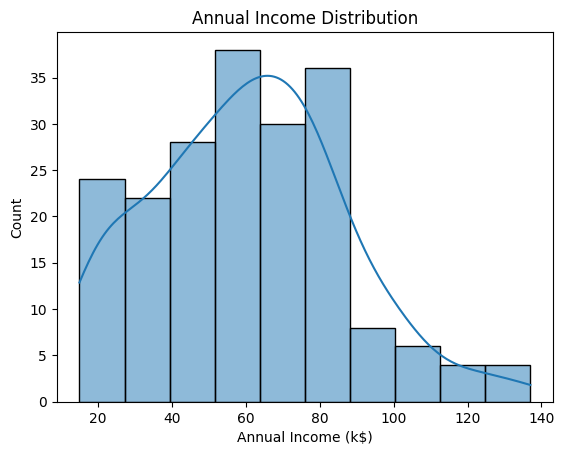

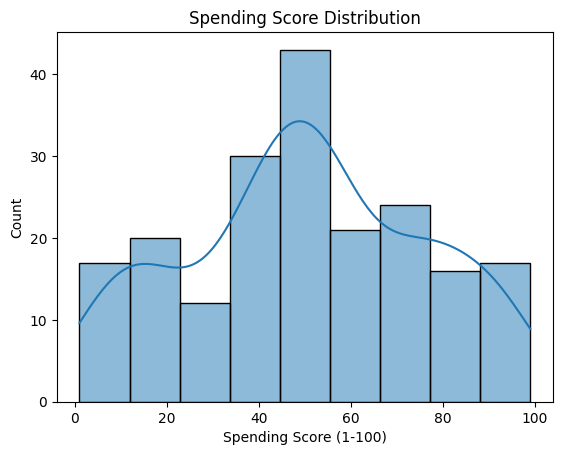

In [ ]:
# Visualize distributions

# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Visualize relationships between variables

# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

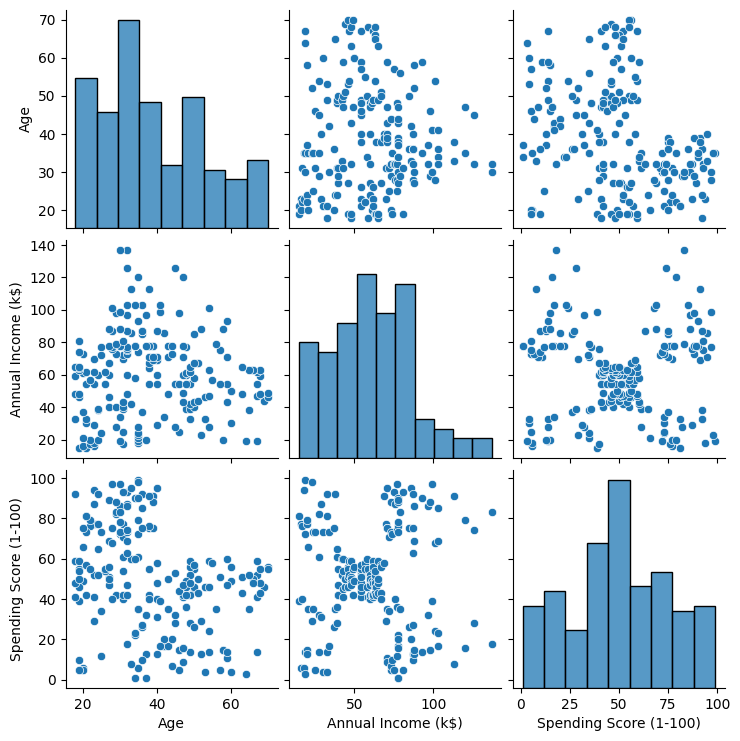

In [ ]:
# Pairplot to show relationships between numerical columns
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

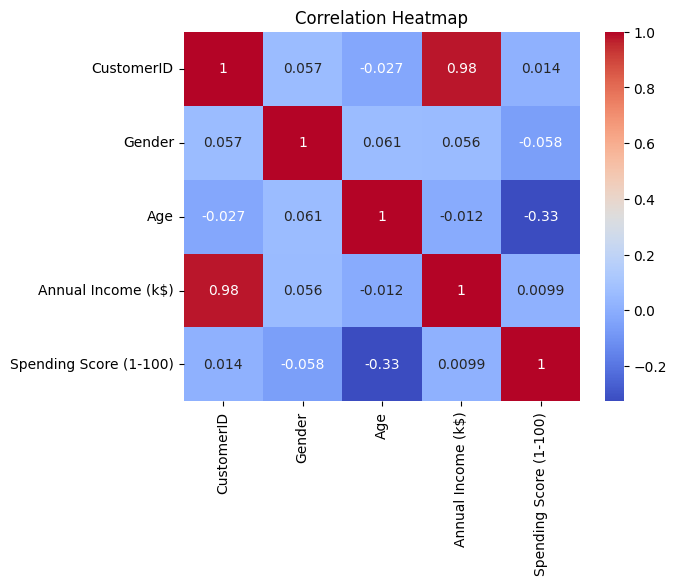

In [ ]:
# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **II. Preprocessing Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **IV. K-Means - Elbow Method**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

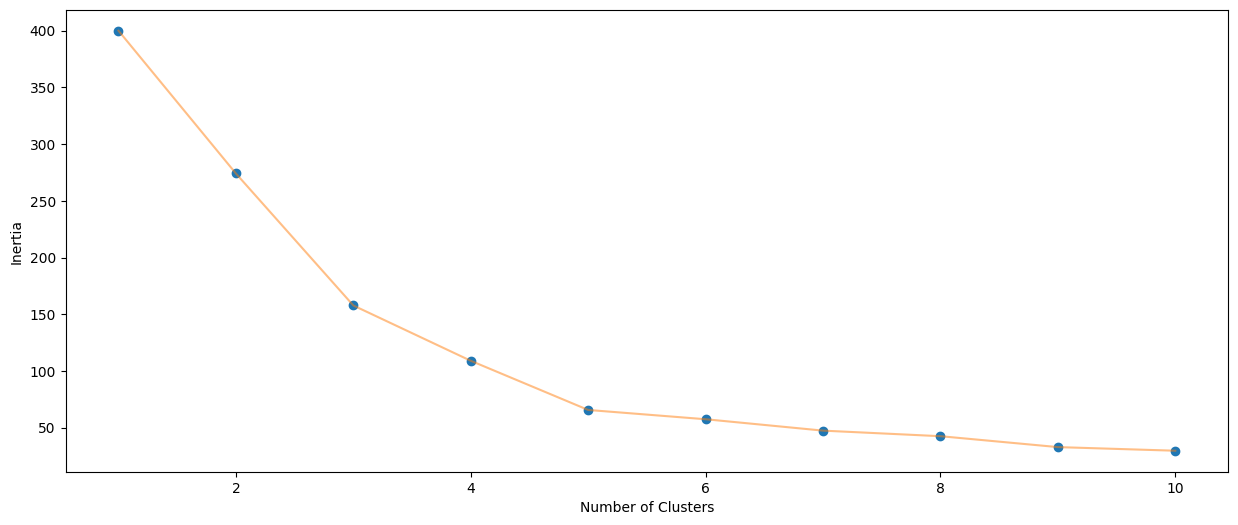

In [ ]:
# 4. K-Means - Elbow Method

from sklearn.cluster import KMeans
import numpy as np

# Try different values of k (1 to 10) and store SSE
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , sse , 'o')
plt.plot(np.arange(1 , 11) , sse , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# **V. K-Means Clustering**

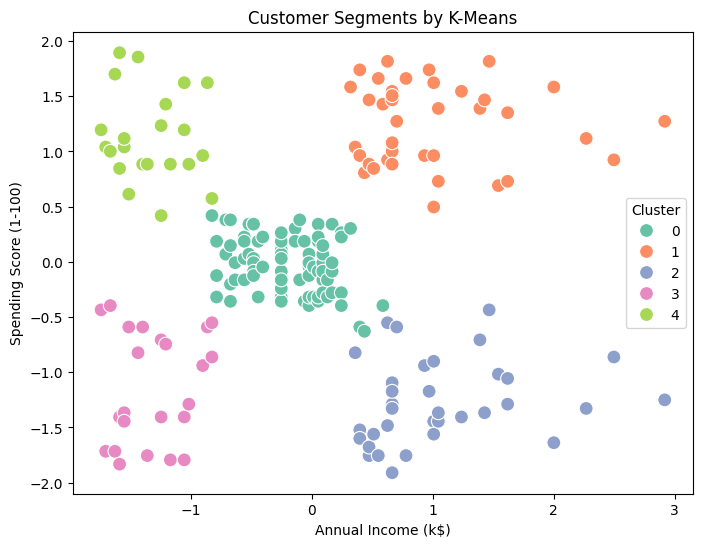

In [ ]:
# Fit K-Means model with chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster to original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# **V. Conclusions**

*   The dataset was clean, with no missing or duplicated values. Gender was successfully encoded as binary (Male=1, Female=0), and the features were ready for analysis.

*   Distributions of age, income, and spending score revealed diverse customer behaviors. The correlation heatmap showed that annual income and spending score are uncorrelated, making them ideal for clustering.

* The Elbow Method indicated that 5 clusters offer the best balance between simplicity and performance, as inertia started flattening beyond this point.

*   Customers were segmented into 5 groups based on Annual Income and Spending Score.

*   Each cluster represents distinct spending behavior and income level. For instance:
  - High income & high spending → Premium target group
  - High income & low spending → Loyalty strategy group
  - Low income & high spending → Discount/promo target group
